<a href="https://colab.research.google.com/github/Kishorevasan2002/Bank_Customer_Churn_Analysis/blob/main/Bank_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading and Preprocessing



In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Project data/bank_dataset.csv",header=0,skiprows=[1])

# Display the first few rows
print(df.head())

   Row Number Customer ID First Name        State  Gender  Age    Salary  \
0           2     MH00002      Nitya  Maharashtra  Female   77   33000.0   
1           3     KA00003     Vivaan    Karnataka    Male   78  190000.0   
2           4     MH00004     Dinesh  Maharashtra    Male   42  330000.0   
3           5     KA00005     Charvi    Karnataka  Female   29  155000.0   
4           6     DL00006      Aditi        Delhi  Female   38  111000.0   

   Credit Score  Tenure    Balance  ...  HasLoan HasFD  Num Of Products  \
0           538       4       0.00  ...        0     0                1   
1           531       8   15585.55  ...        0     1                2   
2           718       3  155688.22  ...        0     1                2   
3           710       7   89415.53  ...        0     1                2   
4           729       2   36613.80  ...        1     0                2   

   IsActiveMember  Exited  Complain  Count of Complains  Satisfaction Score  \
0            

In [472]:
print(df.columns)

Index(['Row Number', 'Customer ID', 'First Name', 'State', 'Gender', 'Age',
       'Salary', 'Credit Score', 'Tenure', 'Balance', 'HasCrCard', 'Card Type',
       'HasLoan', 'HasFD', 'Num Of Products', 'IsActiveMember', 'Exited',
       'Complain', 'Count of Complains', 'Satisfaction Score', 'Point Earned',
       'Preferred Channel'],
      dtype='object')


In [473]:
# Standardize the column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
# Showing the column headers again
df.columns

Index(['row_number', 'customer_id', 'first_name', 'state', 'gender', 'age',
       'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'card_type',
       'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited',
       'complain', 'count_of_complains', 'satisfaction_score', 'point_earned',
       'preferred_channel'],
      dtype='object')

In [474]:
# Check for missing values
print(df.isnull().sum())

row_number            0
customer_id           0
first_name            0
state                 0
gender                6
age                   0
salary                9
credit_score          0
tenure                0
balance               8
hascrcard             0
card_type             5
hasloan               0
hasfd                 0
num_of_products       0
isactivemember        0
exited                0
complain              0
count_of_complains    0
satisfaction_score    9
point_earned          0
preferred_channel     0
dtype: int64


 ## Handle Missing Values


##🔧 Data Cleaning and Imputation

In [475]:
# Impute missing values

# Fill missing 'salary' values with the median
df['salary'] = df['salary'].fillna(df['salary'].median())

# Fill missing 'balance' values with 0
df['balance'] = df['balance'].fillna(0)

# Fill missing 'satisfaction_score' with the median
df['satisfaction_score'] = df['satisfaction_score'].fillna(df['satisfaction_score'].median())

# Drop rows where 'gender' is missing
df = df.dropna(subset=['gender'])

# Fill missing 'card_type' values with the most frequent value (mode)
df['card_type'] = df['card_type'].fillna(df['card_type'].mode()[0])


##🧹 Standardization and Formatting

In [476]:
# Convert 'card_type' to uppercase and remove leading/trailing whitespace
df['card_type'] = df['card_type'].str.upper().str.strip()


##📊 Missing Value Summary

In [477]:
# Print the count of missing values in each column
print(df.isnull().sum())


row_number            0
customer_id           0
first_name            0
state                 0
gender                0
age                   0
salary                0
credit_score          0
tenure                0
balance               0
hascrcard             0
card_type             0
hasloan               0
hasfd                 0
num_of_products       0
isactivemember        0
exited                0
complain              0
count_of_complains    0
satisfaction_score    0
point_earned          0
preferred_channel     0
dtype: int64


##🔎 Unique Card Types (Cleaned)

In [478]:
# Display unique card types after cleaning
print(df['card_type'].unique())


['SILVER' 'GOLD' 'PLATINUM' 'NOT APPLICABLE']


## Explore Numeric Columns

In [479]:
# Identify all numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['row_number', 'age', 'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited', 'complain', 'count_of_complains', 'satisfaction_score', 'point_earned']


In [480]:
# Count unique values in each numeric column
# Get the count of unique values for each numeric column
unique_counts = {col: df[col].nunique() for col in numeric_columns}
unique_counts

{'row_number': 14993,
 'age': 56,
 'salary': 194,
 'credit_score': 435,
 'tenure': 10,
 'balance': 12660,
 'hascrcard': 2,
 'hasloan': 2,
 'hasfd': 2,
 'num_of_products': 4,
 'isactivemember': 2,
 'exited': 2,
 'complain': 2,
 'count_of_complains': 31,
 'satisfaction_score': 10,
 'point_earned': 74}

##  Outlier Detection and Treatment

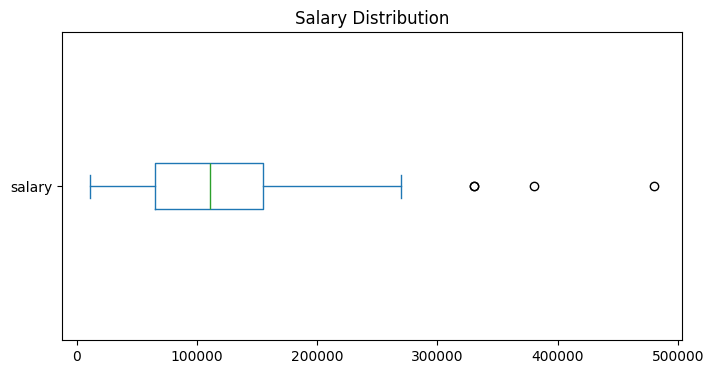

In [481]:
plt.figure(figsize=(8, 4))
df["salary"].plot(kind="box", vert=False)
plt.title("Salary Distribution")
plt.show()

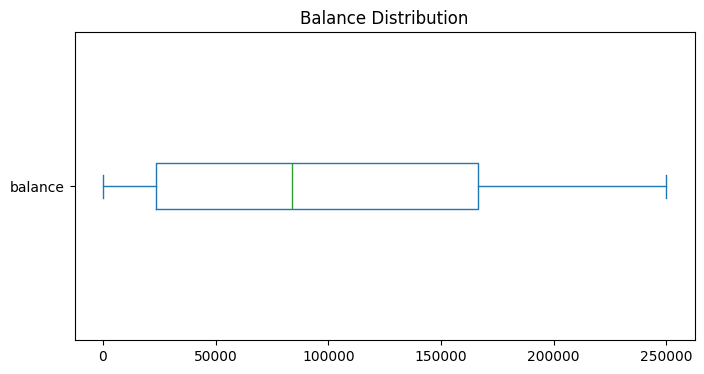

In [482]:
plt.figure(figsize=(8, 4))
df["balance"].plot(kind="box", vert=False)
plt.title("Balance Distribution")
plt.show()

In [483]:
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
salary_outliers = df[(df["salary"] < lower_bound) | (df["salary"] > upper_bound)]

print("Outlier Customers Based on Salary:")
print(salary_outliers[["salary"]])

outlier_count = ((df["salary"] < lower_bound) | (df["salary"] > upper_bound)).sum()
print("Count of Outlier Customers Based on Salary:", outlier_count)

Outlier Customers Based on Salary:
      salary
2   330000.0
36  480000.0
46  330000.0
59  380000.0
Count of Outlier Customers Based on Salary: 4


In [484]:
df["salary"] = np.where(df["salary"] > upper_bound, upper_bound, df["salary"])

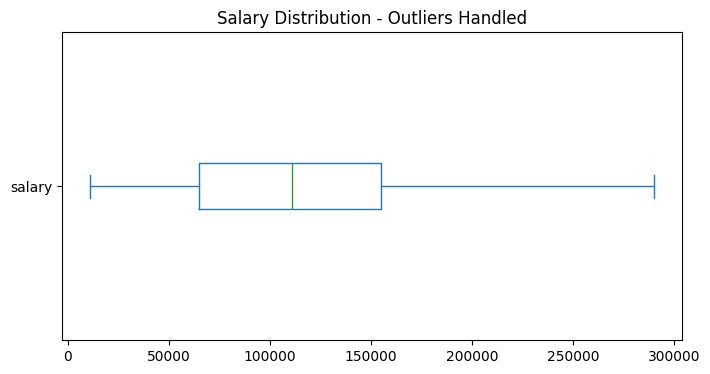

In [485]:
plt.figure(figsize=(8, 4))
df["salary"].plot(kind="box", vert=False)
plt.title("Salary Distribution - Outliers Handled")
plt.show()


## Exploratory Data Analysis

In [486]:
# Calculateing Basic Summary Statistics
# Compute the mean and median for key numeric columns: Salary , Balance and Credit Score

mean_salary = round(df["salary"].mean())
median_salary = round(df["salary"].median())

mean_balance = round(df["balance"].mean())
median_balance = round(df["balance"].median())

mean_credit_score = round(df["credit_score"].mean())
median_credit_score = round(df["credit_score"].median())

# Display results
print(f"Mean Salary: {mean_salary}, Median Salary: {median_salary}")
print(f"Mean Balance: {mean_balance}, Median Balance: {median_balance}")
print(f"Mean Credit Score: {mean_credit_score}, Median Credit Score: {median_credit_score}")

Mean Salary: 110152, Median Salary: 111000
Mean Balance: 96958, Median Balance: 84081
Mean Credit Score: 670, Median Credit Score: 683


In [487]:
# Understanding Categorical Variables
# Count and display how many customers fall into each category of: Gender, Card Type, HasLoan, HasFD

# Count of each category
gender_count = df["gender"].value_counts()
card_type_count = df["card_type"].value_counts()
loan_status_count = df["hasloan"].value_counts()
fd_status_count = df["hasfd"].value_counts()

# Display results
print("Gender Distribution:\n", gender_count)
print("\nCard Type Distribution:\n", card_type_count)
print("\nLoan Status Distribution:\n", loan_status_count)
print("\nFixed Deposit Status Distribution:\n", fd_status_count)

Gender Distribution:
 gender
Male      9028
Female    5965
Name: count, dtype: int64

Card Type Distribution:
 card_type
SILVER            4366
GOLD              4033
PLATINUM          3398
NOT APPLICABLE    3196
Name: count, dtype: int64

Loan Status Distribution:
 hasloan
0    11520
1     3473
Name: count, dtype: int64

Fixed Deposit Status Distribution:
 hasfd
0    8355
1    6638
Name: count, dtype: int64


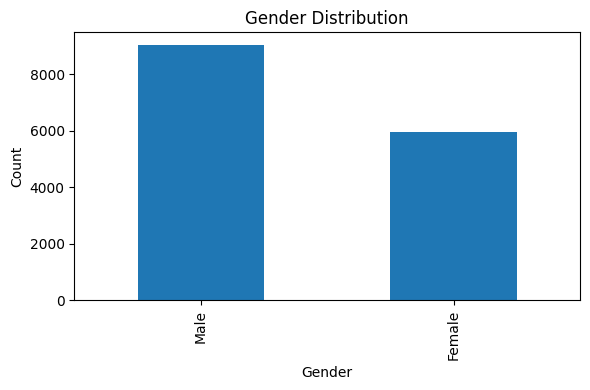

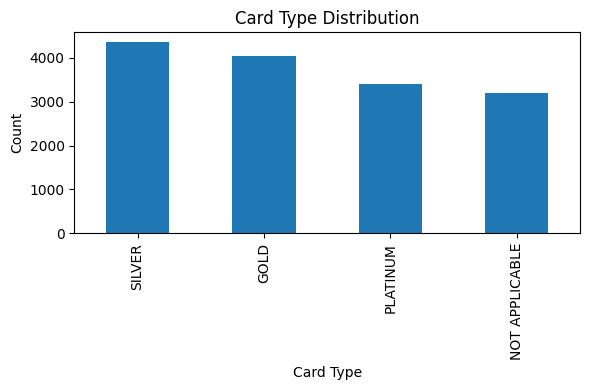

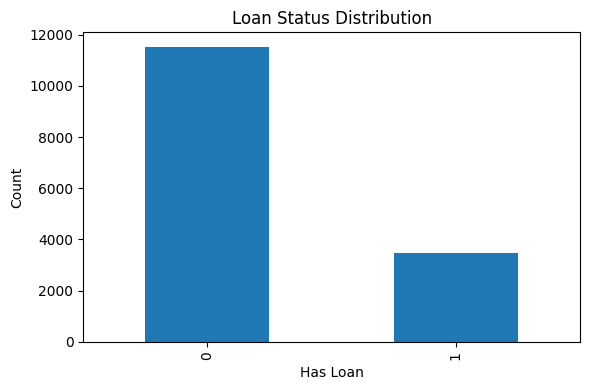

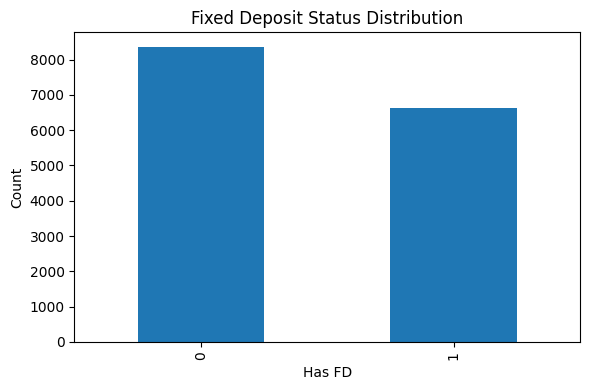

In [488]:
# Plot: gender distribution
plt.figure(figsize=(6, 4))
gender_count.plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot: card type distribution
plt.figure(figsize=(6, 4))
card_type_count.plot(kind='bar')
plt.title("Card Type Distribution")
plt.xlabel("Card Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot: loan status distribution
plt.figure(figsize=(6, 4))
loan_status_count.plot(kind='bar')
plt.title("Loan Status Distribution")
plt.xlabel("Has Loan")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot: fixed deposit status distribution
plt.figure(figsize=(6, 4))
fd_status_count.plot(kind='bar')
plt.title("Fixed Deposit Status Distribution")
plt.xlabel("Has FD")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

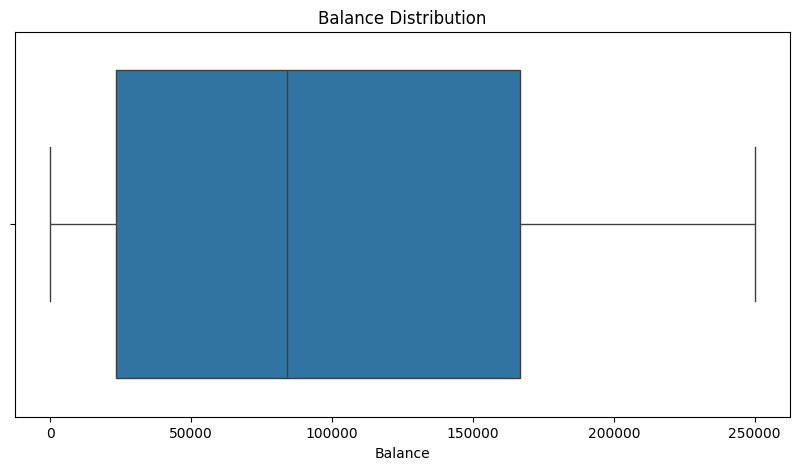

In [489]:
# Balance using boxplots
plt.figure(figsize=(10,5))
sns.boxplot(x=df["balance"])
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.show()


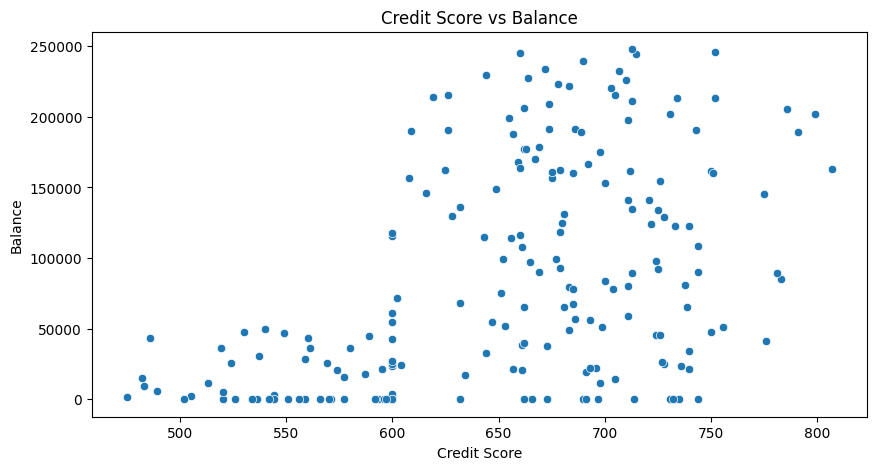

In [490]:
# Subset of data (random sampling) around 200 datapoints are taken here
df_sample = df.sample(n=200, random_state=42)

# Scatter plot: to detect anomalies in Credit Score vs Balance
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_sample["credit_score"], y=df_sample["balance"])
plt.title("Credit Score vs Balance")
plt.xlabel("Credit Score")
plt.ylabel("Balance")
plt.show()

## Feature Engineering

In [491]:
# Adding the following new columns to the dataset:
# Debt-to-Income Ratio
#  Formula: (Balance + (HasLoan × Salary × 0.3)) / Salary

# 1. Financial Stability Indicator
df["Debt-to-Income Ratio"] = (df["balance"] + (df["hasloan"] * df["salary"] * 0.3)) / df["salary"]

print(df[["first_name", "Debt-to-Income Ratio"]].tail())

      first_name  Debt-to-Income Ratio
14994    Anirudh              1.267763
14995     Sanjay              0.233106
14996     Kavita              0.526083
14997    Anirudh              0.695548
14998      Arjun              1.446423


In [492]:
# Createing new column calculating Loyalty Score
# Formula: (Tenure × Satisfaction Score) / (1 + Count of Complains)

df["Loyalty Score"] = (df["tenure"] * df["satisfaction_score"]) / (1 + df["count_of_complains"])

# Display dataset with new features
print(df.head())

   row_number customer_id first_name        state  gender  age    salary  \
0           2     MH00002      Nitya  Maharashtra  Female   77   33000.0   
1           3     KA00003     Vivaan    Karnataka    Male   78  190000.0   
2           4     MH00004     Dinesh  Maharashtra    Male   42  290000.0   
3           5     KA00005     Charvi    Karnataka  Female   29  155000.0   
4           6     DL00006      Aditi        Delhi  Female   38  111000.0   

   credit_score  tenure    balance  ...  num_of_products isactivemember  \
0           538       4       0.00  ...                1              0   
1           531       8   15585.55  ...                2              1   
2           718       3  155688.22  ...                2              1   
3           710       7   89415.53  ...                2              1   
4           729       2   36613.80  ...                2              1   

   exited  complain  count_of_complains  satisfaction_score  point_earned  \
0       1      

## Analyze Complaints by State

In [493]:
# Compute the average number of complaints per state using groupby() and transform().

df["State Avg Complaints"] = df.groupby("state")["count_of_complains"].transform("mean")

In [494]:
# For each customer, compareing their complaint count to their state’s average.
# Create a flag called High Complainer:
# 1 if their complaints are above the state average
# 0 otherwise
df["Above State Avg Complaints"] = df["count_of_complains"] > df["State Avg Complaints"]

df["High Complainer"] = df["Above State Avg Complaints"].astype(int)


In [495]:
df.head(10)

,row_number,customer_id,first_name,state,gender,age,salary,credit_score,tenure,balance,...,complain,count_of_complains,satisfaction_score,point_earned,preferred_channel,Debt-to-Income Ratio,Loyalty Score,State Avg Complaints,Above State Avg Complaints,High Complainer
0,2,MH00002,Nitya,Maharashtra,Female,77,33000.0,538,4,0.00,...,0,0,5.0,100,Mobile,0.000000,20.000000,4.235927,False,0
1,3,KA00003,Vivaan,Karnataka,Male,78,190000.0,531,8,15585.55,...,0,0,10.0,150,Mobile,0.082029,80.000000,4.297710,False,0
2,4,MH00004,Dinesh,Maharashtra,Male,42,290000.0,718,3,155688.22,...,0,0,10.0,150,Phone,0.536856,30.000000,4.235927,False,0
3,5,KA00005,Charvi,Karnataka,Female,29,155000.0,710,7,89415.53,...,0,0,4.0,90,Branch,0.576874,28.000000,4.297710,False,0
4,6,DL00006,Aditi,Delhi,Female,38,111000.0,729,2,36613.80,...,0,0,4.0,90,Email,0.629854,8.000000,4.317580,False,0
5,7,DL00007,Yash,Delhi,Male,76,51000.0,585,2,0.00,...,1,30,1.0,0,Phone,0.300000,0.064516,4.317580,True,1
6,8,MH00008,Ishaan,Maharashtra,Male,30,68000.0,718,2,176184.65,...,0,0,8.0,130,Branch,2.590951,16.000000,4.235927,False,0
7,9,MH00009,Dinesh,Maharashtra,Male,41,145000.0,677,2,44774.77,...,0,0,9.0,140,Email,0.308792,18.000000,4.235927,False,0
8,10,WB00010,Krishna,West Bengal,Male,40,151000.0,695,10,176995.07,...,0,0,9.0,140,Email,1.172153,90.000000,4.188338,False,0
9,11,TN00011,Meenal,Tamil Nadu,Female,77,12000.0,508,3,0.00,...,0,0,6.0,110,Email,0.000000,18.000000,4.055290,False,0


## Univariate Analysis: Categorize customers by Salary

Salary Category
Very High        4180
High             4154
Medium           4070
Low              2583
Above 2 Lakhs       6
Name: count, dtype: int64


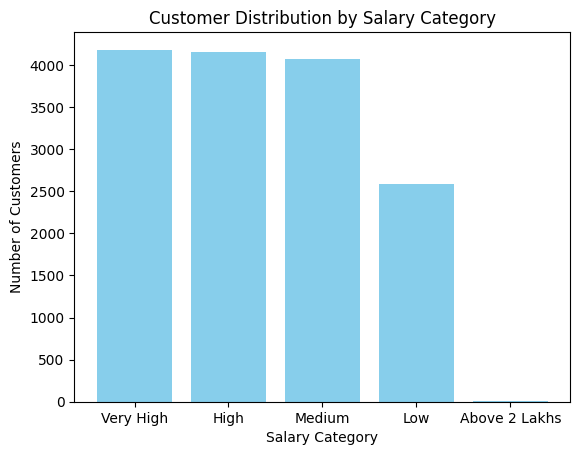

In [496]:
# Created a new column called Salary Category with the following buckets:
# Low (≤ 50,000)
# Medium (50,001 – 100,000)
# High (100,001 – 150,000)
# Very High (150,001 – 200,000)
# Above 2 Lakhs (> 200,000)
# Count of how many customers fall into each group and plot the result.


df["Salary Category"] = np.where(df["salary"] <= 50000, "Low",
                         np.where(df["salary"] <= 100000, "Medium",
                         np.where(df["salary"] <= 150000, "High",
                         np.where(df["salary"] <= 200000, "Very High", "Above 2 Lakhs"))))

# Count of customers in each category
salary_counts = df["Salary Category"].value_counts()

print(salary_counts)

# Plot: salary distribution
# Here, index indicates the labels and values indicate total no of customers that fall into that label
plt.bar(salary_counts.index, salary_counts.values, color="skyblue")
plt.xlabel("Salary Category")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Salary Category")
plt.show()


## Compare Customer Segments Using Grouped Statistics

## Bivariate Analysis

In [497]:
# Calculateing Average Number of Products Based on Customer Tenure

tenure_product_analysis = df.groupby("tenure")["num_of_products"].mean()
# Display results
print("Average Number of Products Based on Customer Tenure:")
print(tenure_product_analysis)

Average Number of Products Based on Customer Tenure:
tenure
1     1.433551
2     1.444779
3     1.437894
4     1.476880
5     1.495677
6     1.490417
7     1.368132
8     1.481707
9     1.511556
10    1.514377
Name: num_of_products, dtype: float64


## Multivariate Analysis

In [498]:
# Grouping by churn status to analyze salary and product usage
churn_analysis = df.groupby("exited")[["salary", "num_of_products"]].mean()
print(churn_analysis)

               salary  num_of_products
exited                                
0       115263.672522         1.509778
1        89064.273504         1.260171


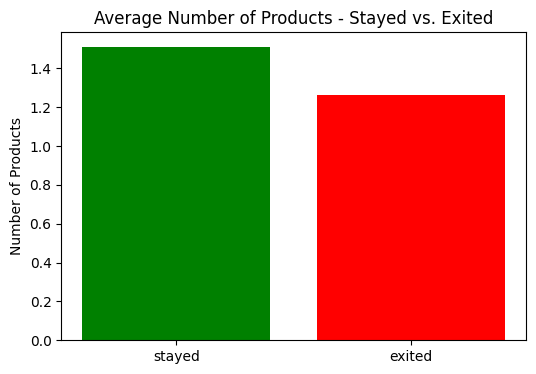

In [499]:
# Bar chart to compare product usage for exited vs. retained customers
plt.figure(figsize=(6, 4))
plt.bar(["stayed", "exited"], churn_analysis["num_of_products"], color=["green", "red"])
plt.title("Average Number of Products - Stayed vs. Exited")
plt.ylabel("Number of Products")
plt.show()

# Demographic Analysis

Demographic factors are measurable characteristics of a population, typically used to segment and understand customers better.
Without understanding these factors, companies may:
- Offer generic solutions that don’t resonate with specific customer segments.
- Miss out on early signs of churn in high-risk groups.
- Fail to optimize marketing campaigns for the right audiences.


In [500]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://gitlab.crio.do/me_notebook/me_jupyter_bankattritionanalysis/-/raw/master/bank_dataset_v3.csv",header=0,skiprows=[1])

# Display the first few rows
print(df.head())

df["card_type"] = df["card_type"].str.upper().str.strip()
df['card_type'].unique()

   rownumber customerid first_name        state  gender  age  tenure  \
0          2    MH00002      Rohan  Maharashtra    Male   54       4   
1          3    KA00003     Ananya    Karnataka  Female   58       1   
2          4    MH00004    Nandini  Maharashtra  Female   39       2   
3          5    WB00005     Charvi  West Bengal  Female   25       3   
4          6    KA00006      Ritik    Karnataka    Male   48       3   

   creditscore    balance  hascrcard  ...  salary  exited  complain  \
0          600  163508.11          1  ...   62000       0         0   
1          724  138773.12          1  ...   97000       0         0   
2          695  136048.53          1  ...  157000       0         0   
3          675   27798.19          0  ...  146000       0         0   
4          600  181554.57          1  ...  102000       0         0   

   numcomplain  satisfaction_score  point_earned  preferredchannel    region  \
0            0                  10           150            

array(['GOLD', 'PLATINUM', 'NOT APPLICABLE', 'SILVER'], dtype=object)

### 1. Visualize customers by churn status


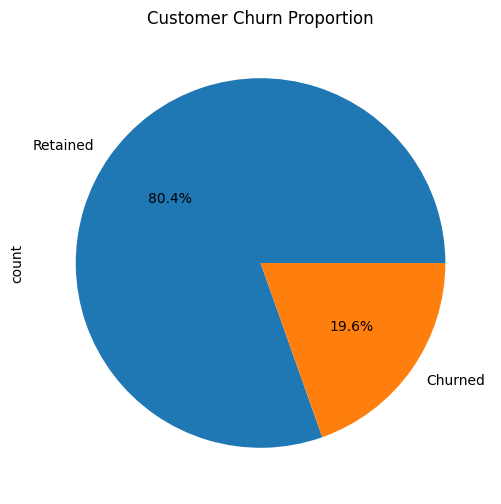

In [501]:
# Count no of churned and non churned customers
churn_counts = df['exited'].value_counts()
# print(churn_counts)
# Labeled retained and churned
labels = ['Retained', 'Churned']
# pie chart
plt.figure(figsize=(6, 6))
churn_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%')
plt.title('Customer Churn Proportion')
plt.show()

### 2. Churn variation across states

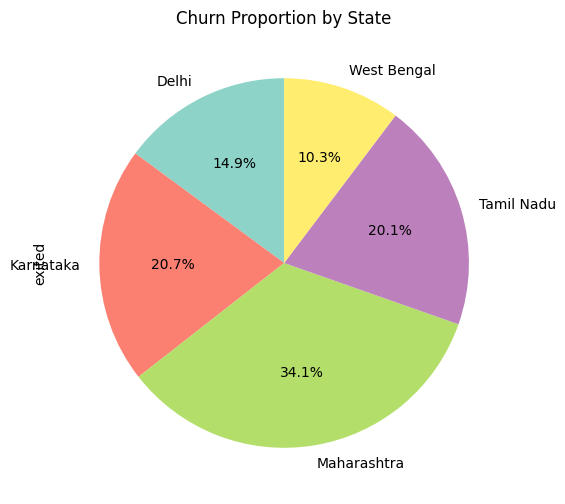

In [502]:
# Grouping the data by region
region_grouped = df.groupby('state')
# Extract the 'exited' column for churned customers
region_exited = region_grouped['exited']
# Calculateing the total number of churned customers per region
region_churn_counts = region_exited.sum()
# pie chart
plt.figure(figsize=(8, 6))
region_churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Churn Proportion by State')
plt.show()

### 3. Visualize age vs exit status

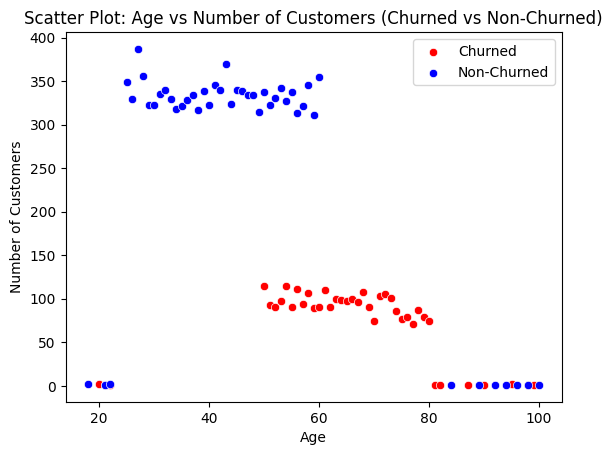

In [503]:
# Count churned and non-churned customers by age
churned_count = df[df['exited'] == 1].groupby('age').size()
non_churned_count = df[df['exited'] == 0].groupby('age').size()
# scatter plot
sns.scatterplot(x=churned_count.index, y=churned_count.values, color='red', label='Churned')
sns.scatterplot(x=non_churned_count.index, y=non_churned_count.values, color='blue', label='Non-Churned')
# Customized plot
plt.title("Scatter Plot: Age vs Number of Customers (Churned vs Non-Churned)")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()


### 4. Visualize age-distribution and exit status


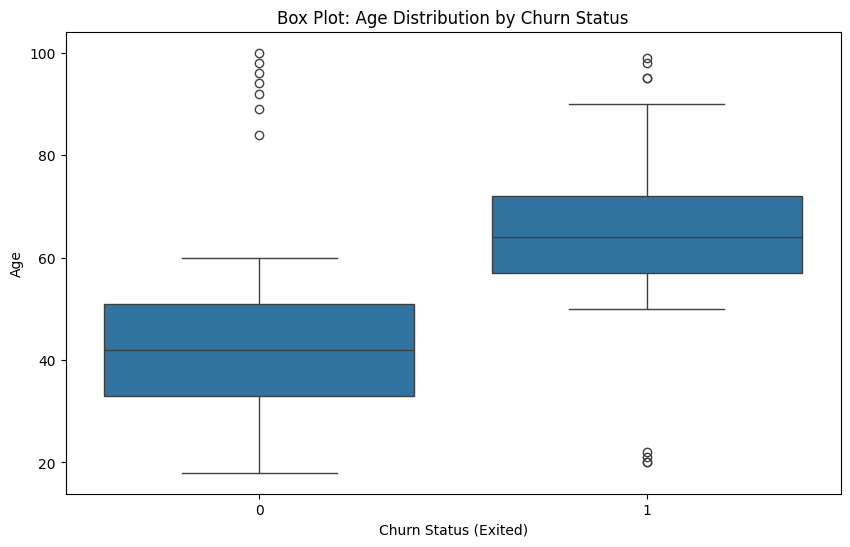

In [504]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='age', data=df)
plt.title("Box Plot: Age Distribution by Churn Status")
plt.xlabel("Churn Status (Exited)")
plt.ylabel("Age")
plt.show()

### 5. Visualize gender and exit status

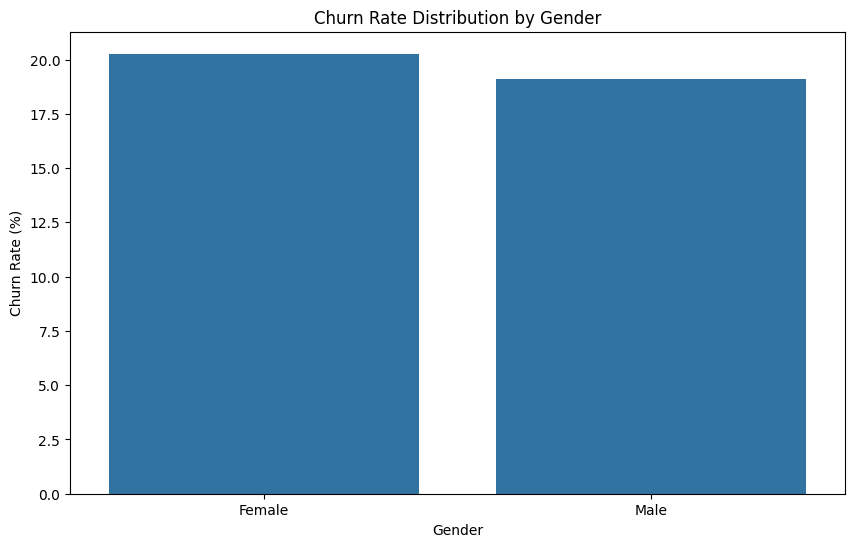

In [505]:
# Filter for customers who have exited (churned)
churned_customers_df = df[df['exited'] == 1]
# Count of total customers per gender
total_customers_by_gender = df.groupby('gender')['exited'].count()
# Count of  churned customers per gender
churned_customers_by_gender = churned_customers_df.groupby('gender')['exited'].count()
# Calculated churn rate manually
churn_rate_by_gender = (churned_customers_by_gender / total_customers_by_gender) * 100
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_gender.index, y=churn_rate_by_gender.values)
plt.title("Churn Rate Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.show()

### 6. Churn Rate by Region and Gender

<Figure size 1200x600 with 0 Axes>

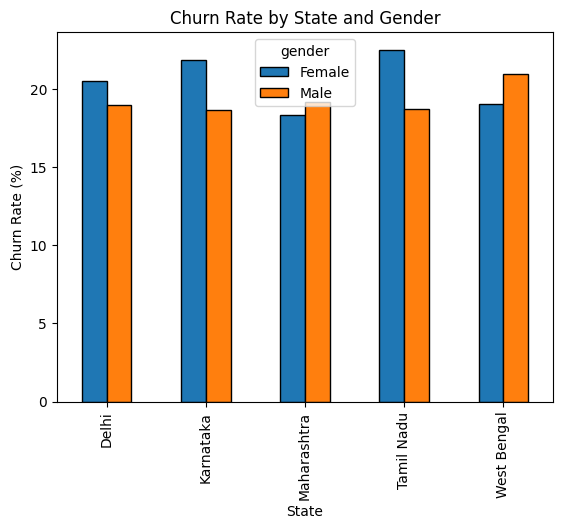

In [506]:
# Grouped data by state and gender
grouped_data = df.groupby(['state', 'gender'])

# Count of  total customers for each group
total_customers = grouped_data['exited'].count()

# Count of churned customers for each group
churned_customers = grouped_data['exited'].sum()  # Since 'exited' is 1 for churned customers

# Calculateing churn rate manually
churn_rate = (churned_customers / total_customers) * 100

churn_rate_unstacked = churn_rate.unstack()

# bar chart
plt.figure(figsize=(12, 6))

churn_rate_unstacked.plot(kind='bar', edgecolor='black')

plt.title('Churn Rate by State and Gender')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.show()


### 7. Relationship between income groups - salary and churn rate.

/tmp/ipython-input-507-3995179168.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_customers_by_income = df.groupby('income_group')['exited'].count()
/tmp/ipython-input-507-3995179168.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_customers_by_income = df.groupby('income_group')['exited'].sum()


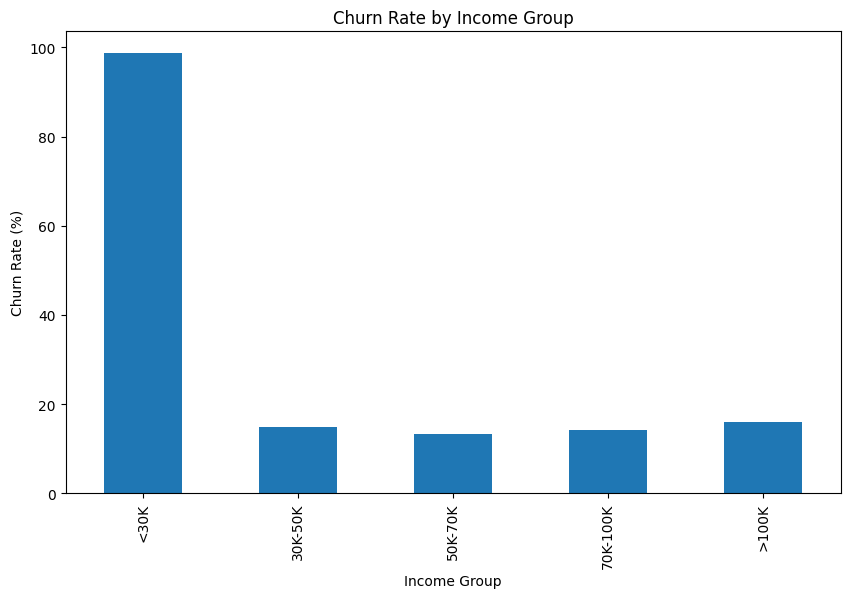

In [507]:
# Created income bins (ranges)
bins = [0, 30000, 50000, 70000, 100000, 150000]  # Example income ranges
labels = ['<30K', '30K-50K', '50K-70K', '70K-100K', '>100K']

# Assigning income group labels
df['income_group'] = pd.cut(df['salary'], bins=bins, labels=labels)

# Count of total customers in each income group
total_customers_by_income = df.groupby('income_group')['exited'].count()

# Count of churned customers in each income group
churned_customers_by_income = df.groupby('income_group')['exited'].sum()

# Calculateing churn rate manually and convert to percentage
churn_rate_by_income = (churned_customers_by_income / total_customers_by_income) * 100

# bar chart
plt.figure(figsize=(10, 6))
churn_rate_by_income.plot(kind='bar')
plt.title('Churn Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Churn Rate (%)')
plt.show()

In [508]:
# bins and labels for age groups
age_bins = [18, 30, 45, 60, 100]  # Age ranges
age_labels = ['18-30', '31-45', '46-60', '60+']  # Corresponding labels

# Applyed pd.cut() to create age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

print(df.head())

   rownumber customerid first_name        state  gender  age  tenure  \
0          2    MH00002      Rohan  Maharashtra    Male   54       4   
1          3    KA00003     Ananya    Karnataka  Female   58       1   
2          4    MH00004    Nandini  Maharashtra  Female   39       2   
3          5    WB00005     Charvi  West Bengal  Female   25       3   
4          6    KA00006      Ritik    Karnataka    Male   48       3   

   creditscore    balance  hascrcard  ... complain  numcomplain  \
0          600  163508.11          1  ...        0            0   
1          724  138773.12          1  ...        0            0   
2          695  136048.53          1  ...        0            0   
3          675   27798.19          0  ...        0            0   
4          600  181554.57          1  ...        0            0   

   satisfaction_score  point_earned  preferredchannel    region  \
0                  10           150            Mobile   Western   
1                   5         


### 8. Count of customers by employment type, highlighting churned vs non-churned customers.



In [509]:
df.columns

Index(['rownumber', 'customerid', 'first_name', 'state', 'gender', 'age',
       'tenure', 'creditscore', 'balance', 'hascrcard', 'card_type', 'hasloan',
       'hasfd', 'numofproducts', 'isactivemember', 'salary', 'exited',
       'complain', 'numcomplain', 'satisfaction_score', 'point_earned',
       'preferredchannel', 'region', 'employment_type', 'residential_status',
       'income_group', 'age_group'],
      dtype='object')

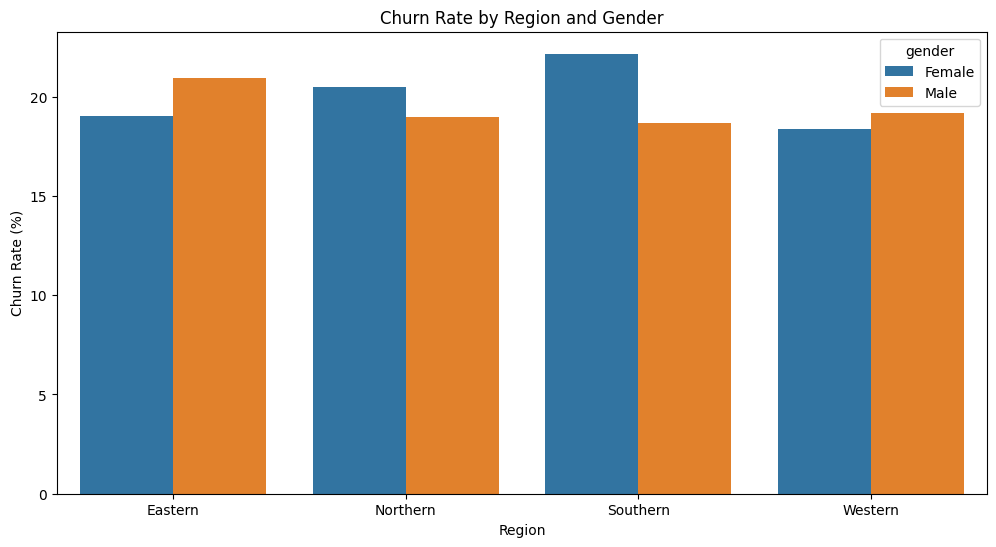

In [510]:
# Calculateing the churn rate by region and gender

# Grouped data by region and gender
grouped_data = df.groupby(['region', 'gender'])

# Count of total customers for each region-gender group
total_customers = grouped_data['exited'].count()

# Count of churned customers for each region-gender group
churned_customers = grouped_data['exited'].sum()  # 'exited' is 1 for churned customers

# Calculated churn rate manually
churn_rate = (churned_customers / total_customers) * 100

# Converted the series into a DataFrame for visualization
churn_rate_region_gender = churn_rate.reset_index(name='churn_rate')

# bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='churn_rate', hue='gender', data=churn_rate_region_gender)

plt.title('Churn Rate by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')

plt.show()


## Product Analysis

Why product analysis is important?

- Bank wants to understand why some of its customers are leaving.
- They suspect that customers who use fewer products (like credit cards, loans, or savings accounts) are more likely to churn.
- They aim to identify which products are most linked to churn to create targeted retention strategies

Eg: A customer using both a credit card and a loan might be more likely to stay because they have multiple touchpoints with the bank.

### 1.  Credit card distribution among churned customers

/tmp/ipython-input-511-1863228022.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=exited_customers["hascrcard"],palette="coolwarm")


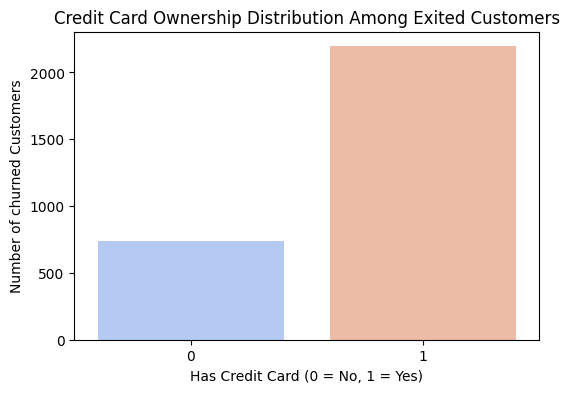

In [511]:
# Filter the dataset where 'isexited' == 1 (indicating customers who have exited)
exited_customers = df[df['exited'] == 1]

#count plot
plt.figure(figsize=(6, 4))
sns.countplot(x=exited_customers["hascrcard"],palette="coolwarm")
plt.title("Credit Card Ownership Distribution Among Exited Customers")
plt.xlabel("Has Credit Card (0 = No, 1 = Yes)")
plt.ylabel("Number of churned Customers")
plt.show()


   hascrcard  exited  count
0          0       0   2494
1          0       1    738
2          1       0   9554
3          1       1   2195
14981


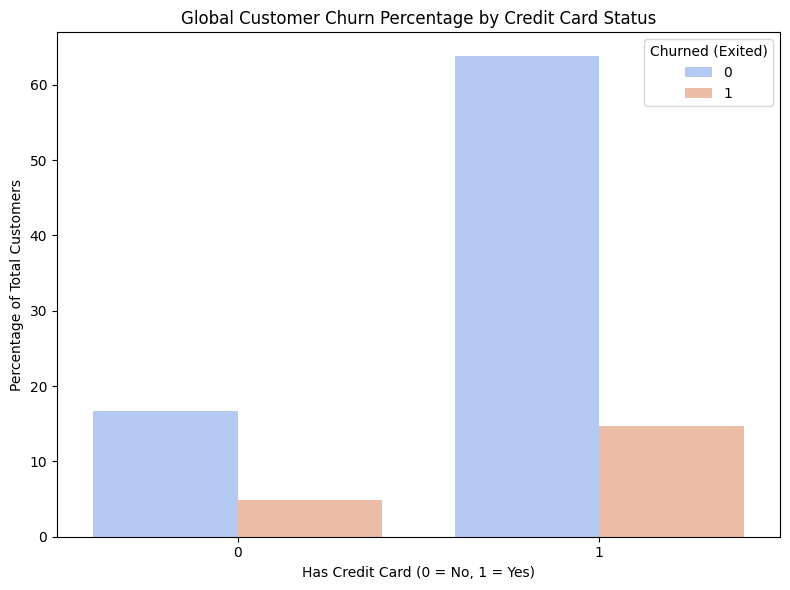

In [512]:
# Group by 'hascrcard' and 'exited' and count number of customers in each group
group_counts = df.groupby(['hascrcard', 'exited']).size().reset_index(name='count')

print(group_counts)

# Calculateing total number of customers
total_customers = group_counts['count'].sum()
print(total_customers)

# Calculateing percentage as (group count / total count) * 100
group_counts['percentage'] = (group_counts['count'] / total_customers) * 100

# bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=group_counts, x='hascrcard', y='percentage', hue='exited', palette="coolwarm", errorbar=None)

plt.title('Global Customer Churn Percentage by Credit Card Status')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Total Customers')
plt.legend(title='Churned (Exited)')
plt.tight_layout()
plt.show()

###  2. Credit card type distribution across churn status

        card_type  exited  count  percentage
0            GOLD       0   3864       25.79
1            GOLD       1    230        1.54
2  NOT APPLICABLE       0   2492       16.63
3  NOT APPLICABLE       1    736        4.91
4        PLATINUM       0   2365       15.79
5        PLATINUM       1    988        6.60
6          SILVER       0   3327       22.21
7          SILVER       1    979        6.53


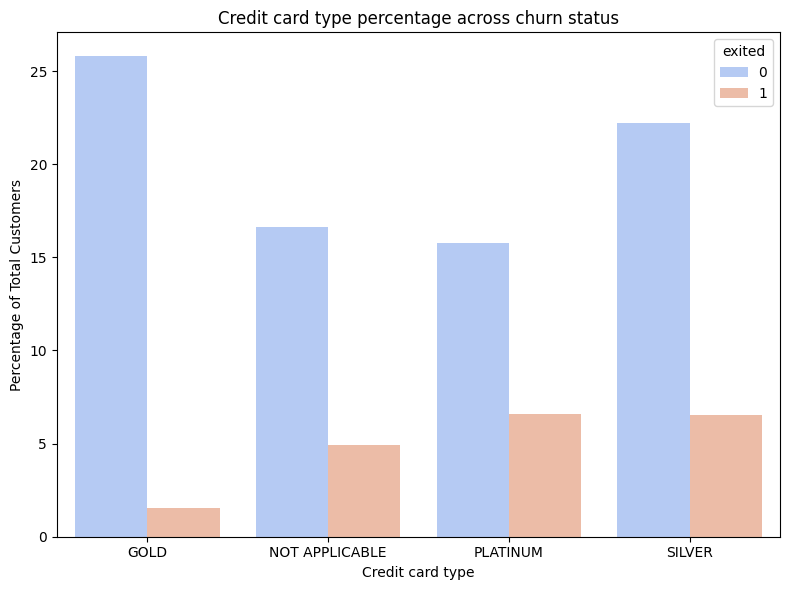

In [513]:

# Group by 'card_type' and 'exited' and count number of customers in each group
card_counts = df.groupby(['card_type', 'exited']).size().reset_index(name='count')

# Calculate total number of customers
total_customers = card_counts['count'].sum()

# Calculate percentage as (group count / total count) * 100 and round
card_counts['percentage'] = ((card_counts['count'] / total_customers) * 100).round(2)

print(card_counts)

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=card_counts, x='card_type', y='percentage', hue='exited', palette="coolwarm", errorbar=None)

plt.title('Credit card type percentage across churn status')
plt.xlabel('Credit card type')
plt.ylabel('Percentage of Total Customers')
plt.tight_layout()
plt.show()


###  3.  Loan ownership vs Churn


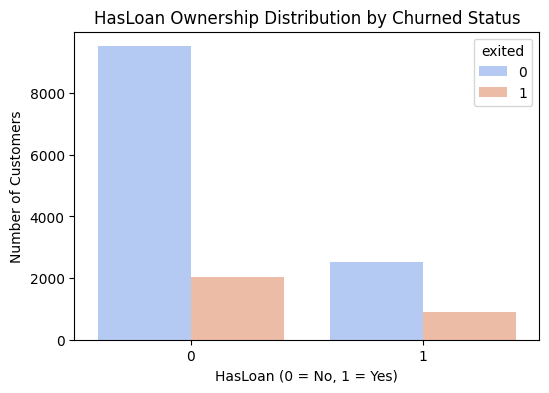

In [514]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["hasloan"], hue=df["exited"], palette="coolwarm")
plt.title("HasLoan Ownership Distribution by Churned Status")
plt.xlabel("HasLoan (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


###  4. Number of products vs churn

/tmp/ipython-input-515-2772184833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=exited_customers["card_type"], palette="coolwarm")


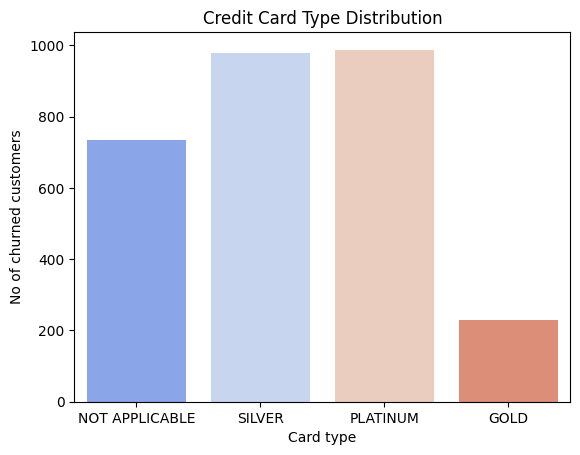

In [515]:
# Credit Card Type Distribution
sns.countplot(x=exited_customers["card_type"], palette="coolwarm")
plt.title("Credit Card Type Distribution")
plt.xlabel("Card type")
plt.ylabel("No of churned customers")
plt.show()


###  5.  Product distribution across churn

Credit card: 
exited
0    9554
1    2195
dtype: int64
Loan count: 
exited
0    2529
1     913
dtype: int64
HasLoan count: 
exited
0    6061
1     609
dtype: int64


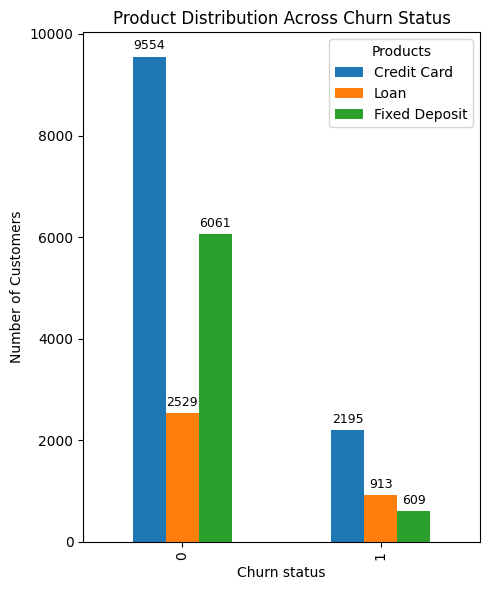

In [516]:
# Group by churn status and each product
crcard = df[df['hascrcard'] == 1].groupby('exited').size()
print("Credit card: ")
print(crcard)

loan = df[df['hasloan'] == 1].groupby('exited').size()
print("Loan count: ")
print(loan)

fd = df[df['hasfd'] == 1].groupby('exited').size()
print("HasLoan count: ")
print(fd)

# Combine into a DataFrame
product_dist = pd.DataFrame({
    'Credit Card': crcard,
    'Loan': loan,
    'Fixed Deposit': fd
})

# Plot the bar chart
ax = product_dist.plot(kind='bar', figsize=(5, 6))

# # labeling bars
ax.bar_label(ax.containers[0], fontsize=9, padding=3)
ax.bar_label(ax.containers[1], fontsize=9, padding=3)
ax.bar_label(ax.containers[2], fontsize=9, padding=3)


plt.title('Product Distribution Across Churn Status')
plt.xlabel('Churn status')
plt.ylabel('Number of Customers')
plt.legend(title='Products')
plt.tight_layout()
plt.show()

###  6. Average product usage by tenure groups across churn status

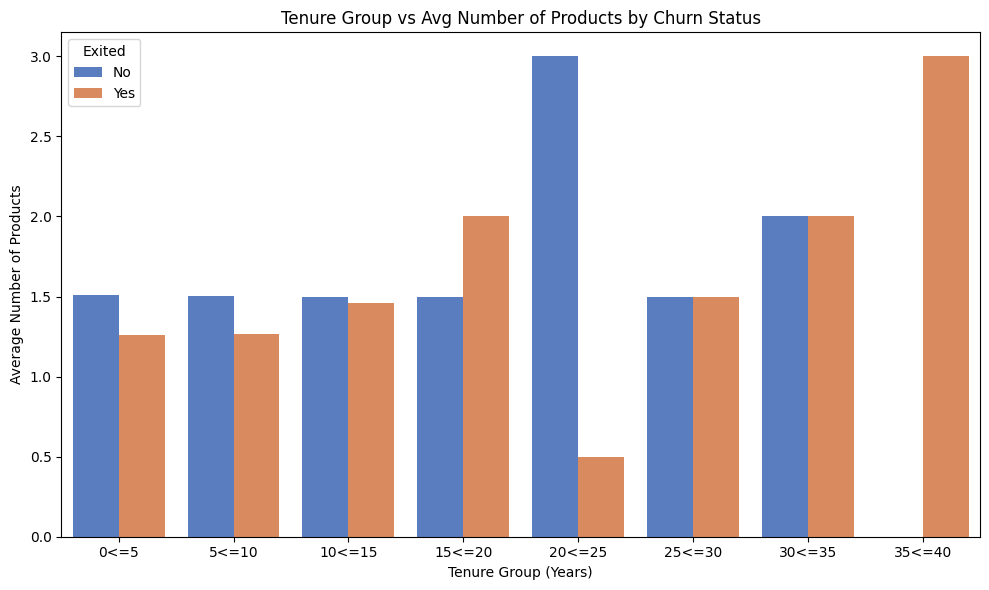

In [517]:

# Createing tenure groups
tenure_bins = list(range(0, 41, 5))
tenure_labels = [f'{i}<={i+5}' for i in range(0, 36, 5)]
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='tenure_group',
    y='numofproducts',
    hue='exited',
    palette='muted',
    errorbar=None
)
plt.xlabel('Tenure Group (Years)')
plt.ylabel('Average Number of Products')
plt.title('Tenure Group vs Avg Number of Products by Churn Status')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


###  7.  Average number of products usage by given credit score ranges across churned status

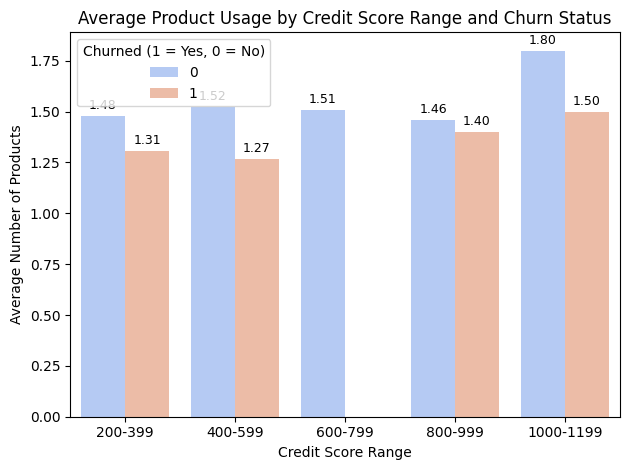

In [518]:
# Createing credit score bins

credit_bins = [200, 400, 600, 800, 1000, 1200]
credit_labels = ['200-399', '400-599', '600-799', '800-999', '1000-1199']

df['credit_score_range'] = pd.cut(df['creditscore'], bins=credit_bins, labels=credit_labels)

# bar plot
ax = sns.barplot(
    data=df,
    x='credit_score_range',
    y='numofproducts',
    hue='exited',
    palette='coolwarm',
    errorbar=None
)

# Annotateing each bar with average value
for p in ax.patches:
    height = p.get_height()
    if pd.notnull(height) and height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.02,
            s=f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Average Product Usage by Credit Score Range and Churn Status')
plt.xlabel('Credit Score Range')
plt.ylabel('Average Number of Products')
plt.legend(title='Churned (1 = Yes, 0 = No)')
plt.tight_layout()
plt.show()


## Feedback Analysis

### 🧠 Assumption 1:
Customers with low satisfaction and low loyalty points are more likely to churn.

✅ Approach:
- We're plotting two continuous variables: satisfaction_score and point_earned.
- A scatter plot helps detect relationships, clusters, or patterns between these two variables.
- Coloring by churn_status adds a third visual dimension — allowing us to visually detect trends in churn behavior based on combinations of satisfaction and rewards.


In [519]:
# Maping 'exited' column to categorical labels
df["churn_status"] = df["exited"].map({0: "Stayed", 1: "Left"})

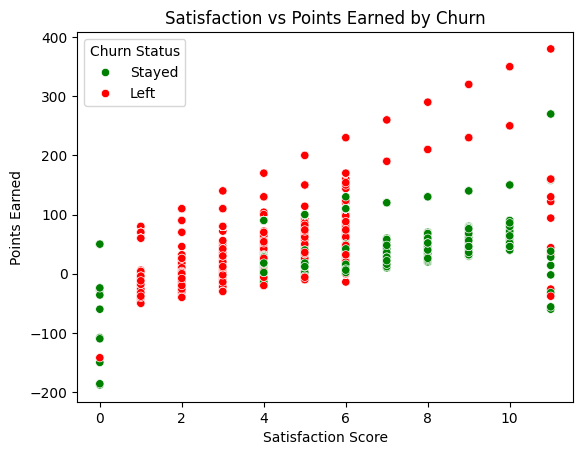

In [520]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(
    data=df,
    x="satisfaction_score",
    y="point_earned",
    hue="churn_status",
    palette={"Stayed": "green", "Left": "red"}
)
plt.title("Satisfaction vs Points Earned by Churn")
plt.xlabel("Satisfaction Score")
plt.ylabel("Points Earned")
plt.legend(title="Churn Status")
plt.show()


### 🧠 Assumption 2:
Customers who churn tend to have lower satisfaction scores than those who stay.


✅ Approach:
- Compare the distribution of satisfaction_score for churned vs non-churned customers.
- Ploting both on the same axis for visual comparison.

📊 Why this chart?
- A histogram shows how a variable is spread out.
- When overlaid, we can spot shifts in the score distribution between groups.

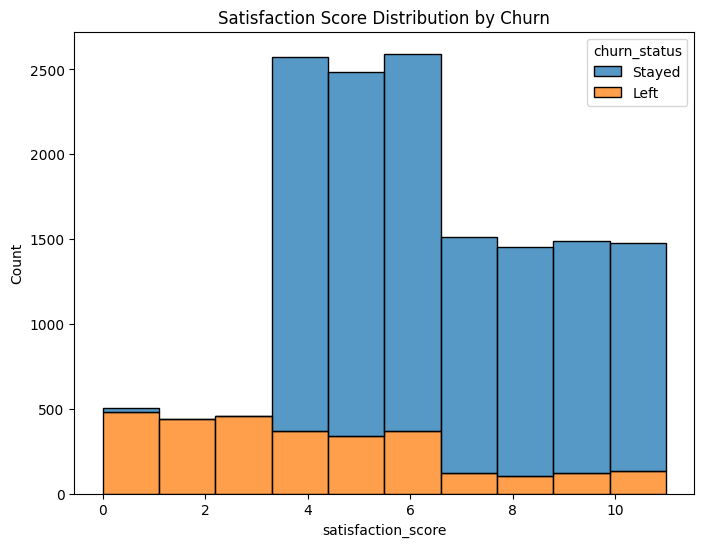

In [521]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='satisfaction_score', bins=10, hue='churn_status', multiple='stack')
plt.title("Satisfaction Score Distribution by Churn")
plt.show()

### 🧠 Assumption 3:
Among those who complained, a higher proportion ended up churning.

✅ Approach:
- Focus only on rows where complain = 1
- Show what portion of them stayed vs left

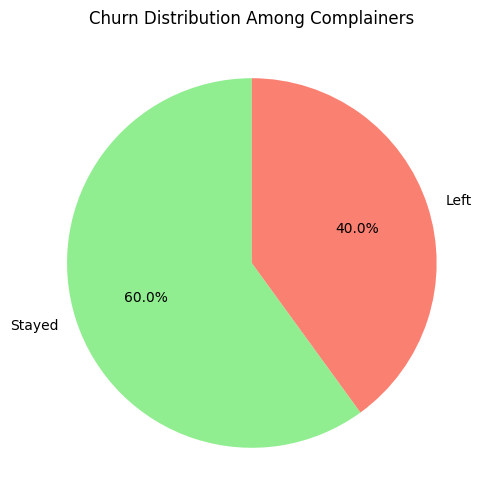

In [522]:
complainers = df[df["complain"] == 1]
churn_distribution = complainers["churn_status"].value_counts(normalize=True).round(1)

plt.figure(figsize=(6,6))
plt.pie(
churn_distribution,
labels=churn_distribution.index,
autopct='%1.1f%%',
startangle=90,
colors=["lightgreen", "salmon"]
)
plt.title("Churn Distribution Among Complainers")
plt.show()


In [523]:
# Calculateing IQR
import numpy as np
Q1 = df["balance"].quantile(0.25)
Q3 = df["balance"].quantile(0.75)
IQR = Q3 - Q1

# Defineing lower and upper caps
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

# Modify the original column directly
df["balance"] = np.where(df["balance"] > upper_cap, upper_cap, df["balance"])

In [524]:
# Calculateing IQR
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper caps
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

# Modify the original column directly
df["salary"] = np.where(df["salary"] > upper_cap, upper_cap, df["salary"])


### Financial Analysis

### Assumption 1
Customers with high salary and high balance are less likely to churn
Approach:
- You’re dealing with two continuous numerical variables: salary and balance.
- A scatter plot is ideal to visualize how those two interact and to detect patterns or clusters related to churn.
- Coloring by churn_status adds an extra dimension (a third variable) visually, making it easier to spot correlations between financial metrics and churn behavior.


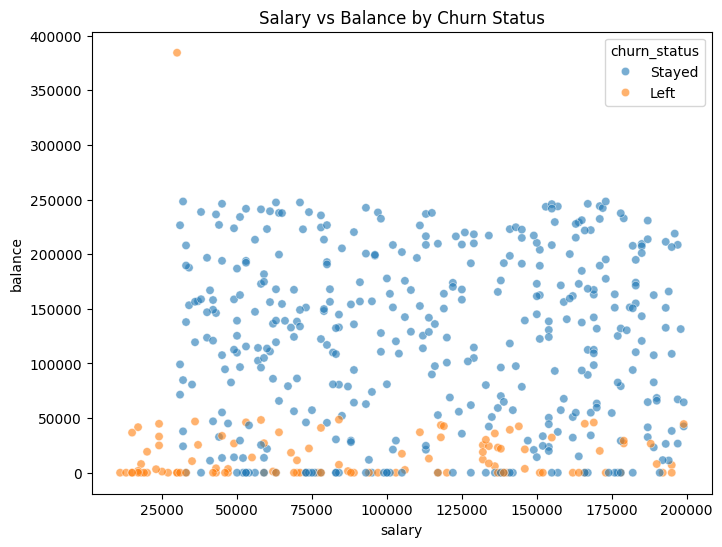

In [525]:
sampled_df = df.sample(n=500, random_state=42)

plt.figure(figsize=(8,6))
sns.scatterplot(data=sampled_df, x="salary", y="balance", hue="churn_status", alpha=0.6)
plt.title("Salary vs Balance by Churn Status")
plt.show()

### Assumption 2
- Customers with more products and lower balances are more likely to churn

Approach:
- Group the data by number of products (numofproducts) and churn status (churn_status).
- Calculate the average balance for each group.
- Use a bar plot to visualize the average balance per product count, with churn status shown as different bars (hue).
- This allows for side-by-side comparisons across product levels to spot trends.


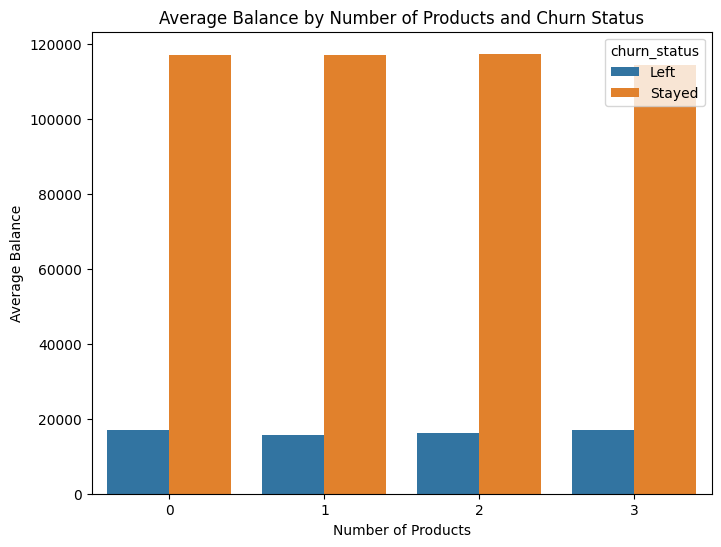

In [526]:
grouped_data = df.groupby(["numofproducts", "churn_status"])["balance"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=grouped_data, x="numofproducts", y="balance", hue="churn_status")
plt.title("Average Balance by Number of Products and Churn Status")
plt.xlabel("Number of Products")
plt.ylabel("Average Balance")
plt.show()

### Assumption 3
- Churn rate differs between FD holders and non-holders

Approach:
- Filter the dataset to include only FD holders (hasfd == 1).
- Use value_counts(normalize=True) gives percentage proportions of churned vs. non-churned customers among FD holders.
- Plot pie chart to show part-to-whole relationships.


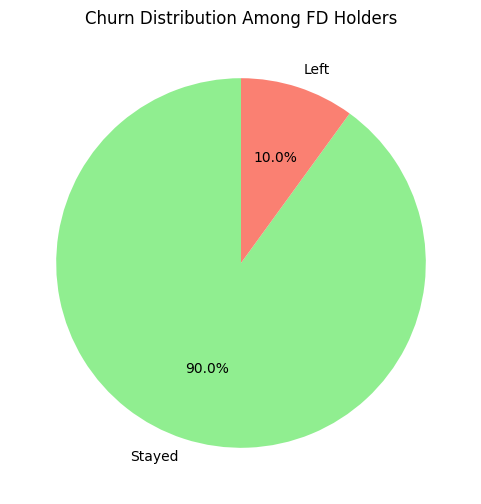

In [527]:
fd_holders = df[df["hasfd"] == 1]
churn_distribution = fd_holders["churn_status"].value_counts(normalize=True).round(1)

plt.figure(figsize=(6,6))
plt.pie(
    churn_distribution,
    labels=churn_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["lightgreen", "salmon"]
)
plt.title("Churn Distribution Among FD Holders")
plt.show()
